For this assignment, you will be working with a modified version of [weather data from London from Kaggle](https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data).

- The assignment is split into 2 parts:
    - Part 1: Load the data and create a datetime index
    - Part 2: Answer 2 Questions using visualizations and the correct frequency data

# Part 1) Load the data and make a datetime index.
- Use the modified version of the data provided here:
    - Share URL: https://docs.google.com/spreadsheets/d/1J2hEGA1-ZOdXOc1Go2AjB7xShq-nAvIDpBz_XRZscHU/edit?usp=sharing
    - Raw URL:
https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv

- You must first load the data and create a datetime index.
    1) Convert the date column to datetime dtype.
    2) Set the date column as the index.
    3) Filter out only the required data:
        - Keep only data from the year 2000 or later.
        - Keep only the following features:
            - precipitation
            - mean_temp
            - min_temp
            - max_temp
            - snow_depth
    4) Impute any missing values.
        - Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!

## Load Data

In [1]:
#IMPORTS
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import datetime as dt

In [2]:
file_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv'
df = pd.read_csv(file_url)
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0


## Set datetime as index

In [3]:
df['datetime'] = pd.to_datetime(df['date'], format='%Y%m%d').dt.strftime('%Y-%m-%d')

In [4]:
df.head(2)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01-01
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01-02


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
 10  datetime          15341 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
df.loc[0,'datetime']


'1979-01-01'

In [7]:
#Convert the date column to datetime dtype
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  int64         
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
 10  datetime          15341 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB


In [8]:
#Set the date column as the index
df = df.set_index('datetime')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
1979-01-01,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [9]:
#Keep only data from the year 2000 and later
df = df.loc['2000':]


In [10]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
2000-01-01,20000101,7.0,0.4,18.0,10.8,7.0,4.9,0.0,102450.0,0.0
2000-01-02,20000102,7.0,0.7,20.0,11.5,7.9,5.0,0.2,102530.0,0.0
2000-01-03,20000103,8.0,0.0,13.0,9.5,9.4,7.2,6.0,101860.0,0.0
2000-01-04,20000104,5.0,2.9,34.0,11.0,7.0,4.4,0.2,101480.0,0.0
2000-01-05,20000105,5.0,1.3,25.0,10.8,6.4,1.9,0.8,101420.0,0.0


## Drop Unwanted Columns

In [11]:
#Dropping unwanted columns
## Keep only the following features: precipitation, mean_temp, min_temp, max_temp, snow_depth

df = df.drop(columns=["date", "cloud_cover", "sunshine", "global_radiation", "pressure"])
df.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0


In [12]:
#Checking for missing values
df.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='datetime', length=7671, freq=None)

In [13]:
df.describe()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
count,7281.000000,7252.000000,7285.000000,7281.000000,5919.000000
mean,15.810850,11.907308,8.000480,1.723376,0.023146
std,6.526161,5.669191,5.242933,3.675610,0.306467
min,-1.200000,-4.100000,-9.400000,0.000000,0.000000
25%,10.800000,7.600000,4.100000,0.000000,0.000000
50%,15.600000,11.800000,8.200000,0.000000,0.000000
75%,20.700000,16.400000,12.100000,1.800000,0.000000
max,37.900000,29.000000,22.300000,51.600000,12.000000


In [14]:
# Set frequency to daily
df = df.asfreq('D')
#Preview index to ensure frequency is updated
df.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='datetime', length=7671, freq='D')

## Impute Missing Values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Freq: D
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   max_temp       7281 non-null   float64
 1   mean_temp      7252 non-null   float64
 2   min_temp       7285 non-null   float64
 3   precipitation  7281 non-null   float64
 4   snow_depth     5919 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


### Interpolate method

In [16]:
#max_temp column
df['max_temp'] = df['max_temp'].interpolate()

# mean_temp column
df['mean_temp'] = df['mean_temp'].interpolate()

# min_temp column
df['min_temp'] = df['min_temp'].interpolate()

#precipitation
df['precipitation'] = df['precipitation'].interpolate()

### Forward-filling method

In [17]:
#snow_depth column
df['snow_depth'] = df['snow_depth'].fillna(method='ffill')

In [18]:
# Ensuring missing values are imputed
df.isna().sum()

max_temp         0
mean_temp        0
min_temp         0
precipitation    0
snow_depth       0
dtype: int64

# Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)

- For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.
- Plot the feature that the question is asking about.
    - If there is a specific time period, plot only that time period.

## What month had the most precipitation between 2000 through 2010?

In [19]:
df00_10 = df.loc['2000':'2010']
# Setting frequency to monthly- 1st of the month
df00_10 = df00_10.resample('MS').max()
df00_10

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
2000-01-01,12.9,11.6,10.4,6.0,0.0
2000-02-01,13.8,10.4,9.1,16.8,0.0
2000-03-01,16.6,13.9,11.2,7.2,0.0
2000-04-01,18.7,13.9,10.2,17.2,0.0
2000-05-01,26.6,21.0,15.4,19.0,0.0
...,...,...,...,...,...
2010-08-01,25.4,21.7,19.1,20.6,0.0
2010-09-01,23.9,19.5,16.4,9.8,0.0
2010-10-01,21.1,17.0,15.2,21.8,0.0


In [21]:
# Finding the date and corresponding value for the max precipitation.
df00_10['precipitation'].idxmax()


Timestamp('2000-10-01 00:00:00', freq='MS')

- **What month had the most precipitation between 2000 through 2010?**
    - October 2000

### Visualizing Precipitation

In [22]:
import matplotlib.pyplot as plt

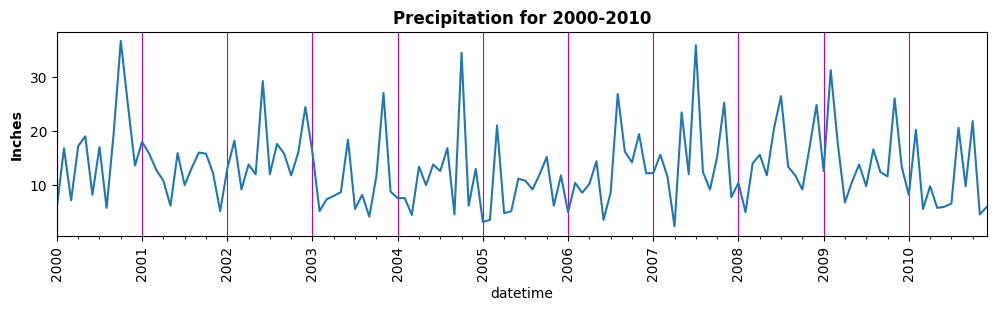

In [23]:
# Plot the feature and time period that corresponds to the question.
fig, ax = plt.subplots(figsize=(12,3))
#plotting just the precipitation feature by year
df00_10['precipitation'].plot(ax=ax)
ax.grid(which='major', axis='x', color='m')
#Setting labels
ax.set_ylabel('Inches', fontweight='bold')
ax.set_title('Precipitation for 2000-2010', fontweight='bold')
fig.autofmt_xdate(rotation=90, ha='center');

## Which year between 2000-2020 had the coolest average temperature?

In [24]:
#Slicing out 2000-2010
df00_20 = df.loc['2000':'2020']
# group the data by year and then apply the mean() function to calculate the mean for each group.
df00_20 = df00_20.resample('Y').mean()
df00_20['min_temp']

datetime
2000-12-31    8.001503
2001-12-31    7.647397
2002-12-31    8.425890
2003-12-31    7.895890
2004-12-31    8.234563
2005-12-31    7.973562
2006-12-31    8.506301
2007-12-31    8.120137
2008-12-31    7.568852
2009-12-31    7.736164
2010-12-31    6.801370
2011-12-31    8.338219
2012-12-31    7.378005
2013-12-31    7.362603
2014-12-31    8.647534
2015-12-31    8.185753
2016-12-31    7.925820
2017-12-31    8.340959
2018-12-31    8.321918
2019-12-31    7.932055
2020-12-31    8.688798
Freq: A-DEC, Name: min_temp, dtype: float64

In [25]:
df00_20['min_temp'].idxmin()

Timestamp('2010-12-31 00:00:00', freq='A-DEC')

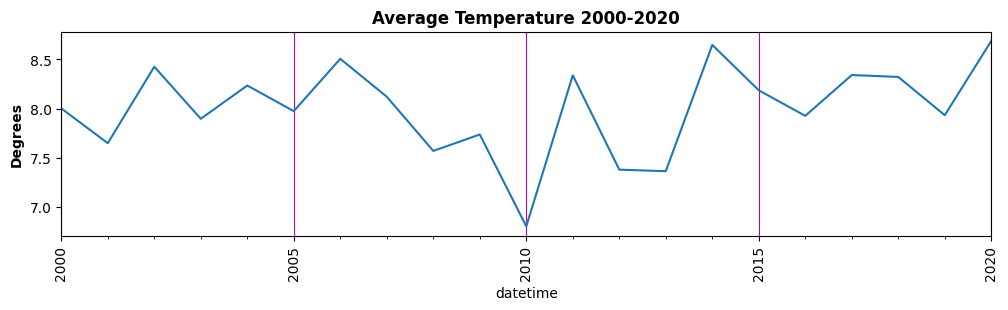

In [26]:
# Plot the feature and time period that corresponds to the question.
fig, ax = plt.subplots(figsize=(12,3))
#plotting just the precipitation feature by year
df00_20['min_temp'].plot(ax=ax)
ax.grid(which='major', axis='x', color='m')
#Setting labels
ax.set_ylabel('Degrees', fontweight='bold')
ax.set_title('Average Temperature 2000-2020', fontweight='bold')
fig.autofmt_xdate(rotation=90, ha='center');

- **Which year between 2000-2020 had the coolest average temperature?**
    -  2010